## Data preparation and visualization
The dataset must be prepared according to the following steps:

In [64]:
# Remove warnings from output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load power dataset
building_data_train = pd.read_csv("data/building_4_weather_1_train.csv", parse_dates=["timestamp"], index_col=["timestamp"])

# Load power dataset
building_data_test = pd.read_csv("data/building_4_weather_1_test.csv", parse_dates=["timestamp"], index_col=["timestamp"])

# Load weather dataset
weather_data = pd.read_csv("data/weather_1.csv", parse_dates=["timestamp"], index_col=["timestamp"])

**1.1** Merge the different data sources (i.e. building consumption and weather) for both training and testing.

In [65]:
# Check for duplicate timestamps
print(f"Num of duplicated \"timestamp\" in weather_data: {weather_data.index.duplicated().sum()}")
print(f"Duplicated \"timestamp\" in weather_data:\n{weather_data[weather_data.index.duplicated()]}")
print()
print(f"Num of duplicated \"timestamp\" in building_data_train: {building_data_train.index.duplicated().sum()}")
print()

# There are:
# 1 duplicated "timestamp" in weather_data
# 0 duplicated "timestamp" in building_data_train

# Remove duplicated timestamps
weather_data = weather_data[~weather_data.index.duplicated()]

Num of duplicated "timestamp" in weather_data: 1
Duplicated "timestamp" in weather_data:
                     airTemperature
timestamp                          
2017-10-29 02:00:00            12.8

Num of duplicated "timestamp" in building_data_train: 0



In [66]:
# Check for missing timestamps
missing_timestamps_weather = pd.date_range(start=weather_data.index.min(), end=weather_data.index.max(), freq="H")
missing_timestamps_weather = missing_timestamps_weather.difference(weather_data.index)
print(f"Missing \"timestamp\" in weather_data:\n {missing_timestamps_weather}")
print()
missing_timestamps_building = pd.date_range(start=building_data_train.index.min(), end=building_data_train.index.max(), freq="H")
missing_timestamps_building = missing_timestamps_building.difference(building_data_train.index)
print(f"Missing \"timestamp\" in building_data_train:\n {missing_timestamps_building}")
print()

# There are:
# 1 missing "timestamp" in weather_data
# 0 missing "timestamp" in building_data_train

# Fill missing timestamps
weather_data = weather_data.asfreq('H',method='ffill')

Missing "timestamp" in weather_data:
 DatetimeIndex(['2017-03-26 02:00:00'], dtype='datetime64[ns]', freq=None)

Missing "timestamp" in building_data_train:
 DatetimeIndex([], dtype='datetime64[ns]', freq='H')



In [67]:
# Now that we know that the index ("timestamp") are fixed we can merge the datasets

# Merge the energy and temperature datasets
data = building_data_train.join(weather_data, how='inner')

**1.2** _Identification of statistical outliers_: statistical outliers should be identified (if they exists) according to one of the methods analyzed during the course and removed for both the training and testing dataset.

Number of outliers detected with Z-score method: 66


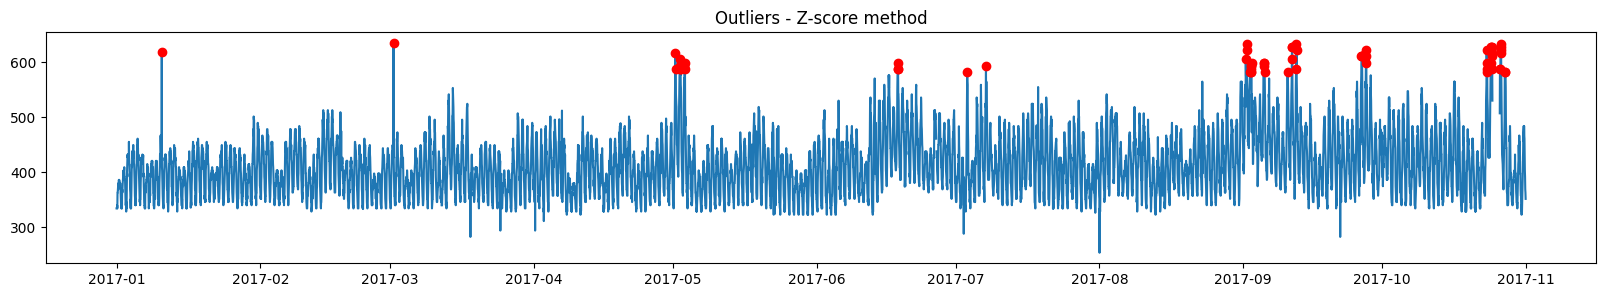

In [68]:
# Outlier detection: Z-score method

z_scores = (data['power'] - data['power'].mean()) / data['power'].std()
std_limit = 3
outliers_z_score = data['power'][(z_scores > std_limit) | (z_scores < -std_limit)]

print(f"Number of outliers detected with Z-score method: {len(outliers_z_score)}")

fig, ax = plt.subplots(figsize=(20, 3))
ax.set_title("Outliers - Z-score method")
# ax.set_label(f"Count {len(outliers_z_score)}")
ax.plot(data['power'])
ax.plot(outliers_z_score.index, data.loc[outliers_z_score.index, 'power'], 'ro')

Number of outliers detected with interquartile method: 38


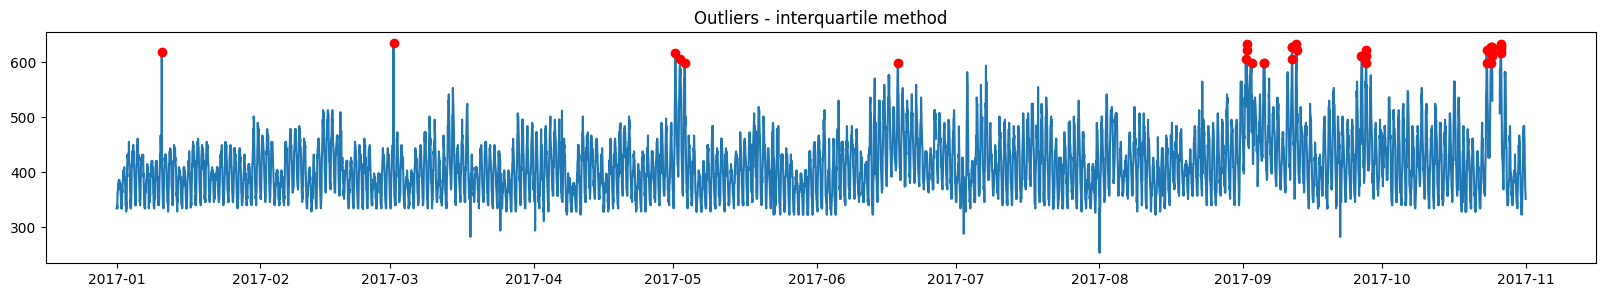

In [69]:
# Outlier detection: interquartile (or boxplot) method

Q1 = data['power'].quantile(0.25)
Q3 = data['power'].quantile(0.75)
IQR = Q3 - Q1
IQR_limit = 2

outliers_interquartile = data['power'][(data['power'] < Q1 - IQR_limit*IQR) | (data['power'] > Q3 + IQR_limit*IQR)]

print(f"Number of outliers detected with interquartile method: {len(outliers_interquartile)}")

fig, ax = plt.subplots(figsize=(20, 3))
ax.set_title("Outliers - interquartile method")
# ax.set_label(f"Count {len(outliers_interquartile)}")
ax.plot(data['power'])
ax.plot(outliers_interquartile.index, data.loc[outliers_interquartile.index, 'power'], 'ro')

**1.3** _Missing values replacement_: missing values should be replaced according to one of the methods analyzed during the course for both training and testing set. Pay attention to not abuse of replacement methods. Avoid filling gaps larger than 3 timesteps.

In [70]:
# Check for null values of "power" and "airTemperature"
print(f"Num of null \"airTemperature\" data: {data['airTemperature'].isna().sum()}")
print()
print(f"Num of null \"power\" data: {data['power'].isna().sum()}")
data[data['power'].isna()]

# There are:
# 0 null "airTemperature" data
# 46 null "power" data

Num of null "airTemperature" data: 0

Num of null "power" data: 46


,power,airTemperature
timestamp,,
2017-03-12 02:00:00,NaN,10.6
2017-06-26 20:00:00,NaN,17.8
2017-09-01 16:00:00,NaN,36.7
2017-09-01 17:00:00,NaN,35.0
2017-09-01 18:00:00,NaN,32.2
2017-09-05 11:00:00,NaN,25.6
2017-09-05 12:00:00,NaN,26.7
2017-09-05 13:00:00,NaN,26.7
2017-10-08 14:00:00,NaN,25.0


In [71]:
# In this type of problem, when there is a NaN hole for 4/6/8 hours
# it is BETTER TO ELIMINATE THE DATA THAN INTERPOLATE.
print(data.index[0])
# Delete the NaN "big" holes (2017-10-24, 2017-10-25, 2017-10-26)
data = data[ (data.index < "2017-10-24 00:00:00") | (data.index > "2017-10-26 23:59:00")]
print(f"Num of missing values in building_data_train: {data['power'].isna().sum()}")
data[data['power'].isna()]

2017-01-01 00:00:00
Num of missing values in building_data_train: 9


,power,airTemperature
timestamp,,
2017-03-12 02:00:00,NaN,10.6
2017-06-26 20:00:00,NaN,17.8
2017-09-01 16:00:00,NaN,36.7
2017-09-01 17:00:00,NaN,35.0
2017-09-01 18:00:00,NaN,32.2
2017-09-05 11:00:00,NaN,25.6
2017-09-05 12:00:00,NaN,26.7
2017-09-05 13:00:00,NaN,26.7
2017-10-08 14:00:00,NaN,25.0


In [72]:
# Fill NaN "small" holes (max 3 hours in a row)
data['power'].interpolate(method='polynomial', limit=3, inplace=True, order=2)

print(f"Num of missing values in building_data_train: {data['power'].isna().sum()}")

Num of missing values in building_data_train: 0


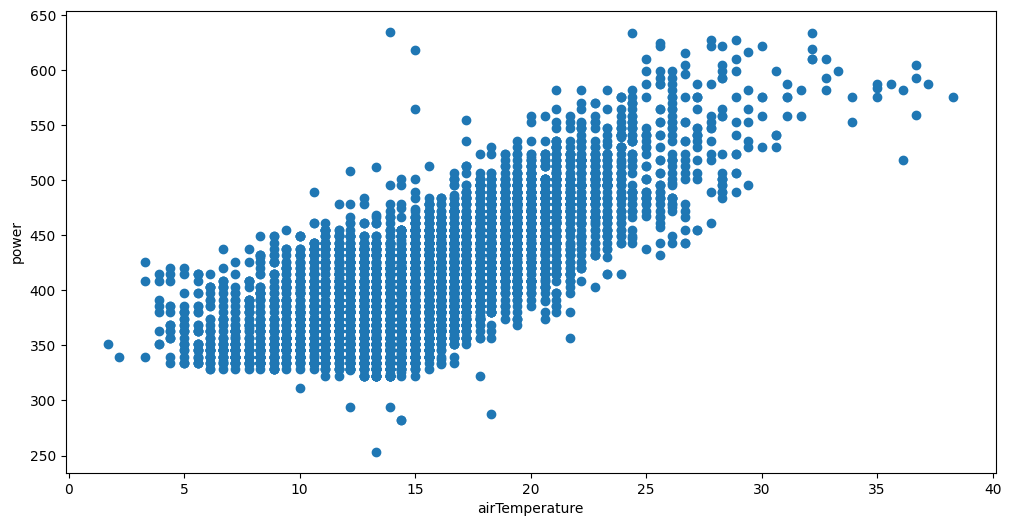

In [73]:
#scatter plot with outliers

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['airTemperature'], data['power'])
ax.set_xlabel('airTemperature')
ax.set_ylabel('power')
plt.show()

In [74]:
from scipy.stats import iqr
 
# Load the dataset
# TODO: Outlier deletion

def replace_outliers_na(data, column, multiplier=1.5):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the dataset to remove the outliers
    mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[mask, column] = np.nan

    return data

data = replace_outliers_na(data.copy(), 'power',2)

#replace outliers with median value of power based on airTemperature

# create a new column with temperature rounded to the nearest multiple of 5
data["Temp_Range"] = data["airTemperature"].apply(lambda x: round(x / 1) * 1)

print(data["Temp_Range"].unique())

# calculate the mean power for each temperature range
mean_power = data.groupby("Temp_Range")["power"].mean()

# fill the NaN values in "Power" column with the mean power of the corresponding temperature range
data["power"].fillna(data["Temp_Range"].map(mean_power), inplace=True)
data.drop("Temp_Range",axis=1,inplace=True)
# data['power'] = data.groupby('airTemperature')['power'].transform(lambda x: x.fillna(x.median()))
# print(f"Num of missing values in building_data_train: {data['power'].isna().sum()}")

data.dropna(inplace=True)

[ 8 11 10 13 12  9  7  6  5  4  2  3 14 16 15 17 18 19 20 21 22 24 23 26
 25 29 27 28 31 30 33 36 35 32 34 37 38]


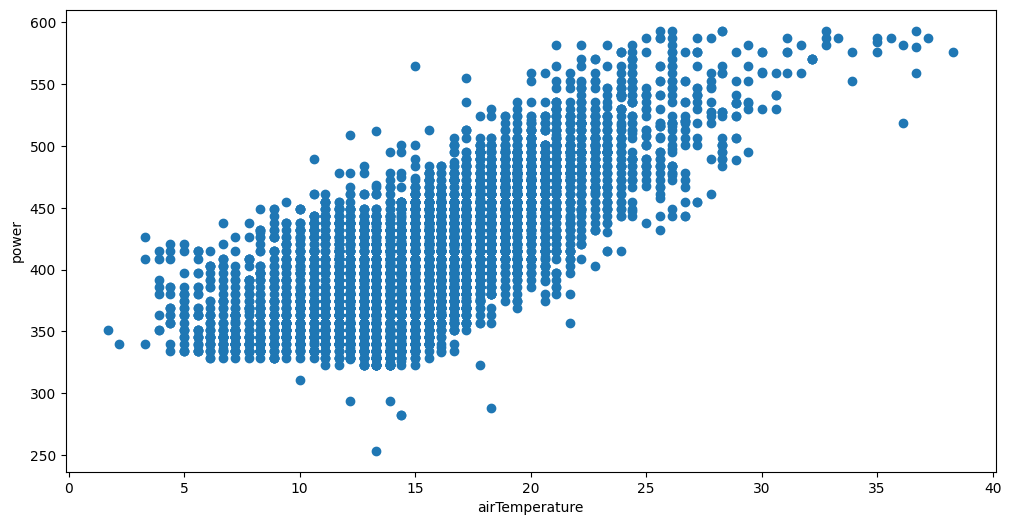

In [75]:
#scatter plot without outliers

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['airTemperature'], data['power'])
ax.set_xlabel('airTemperature')
ax.set_ylabel('power')
plt.show()

In [76]:
#remove all the data with power consumption less than 300
data['power']=data['power'].apply(lambda x: np.nan if x<300 else x)

In [77]:
# Fill NaN "small" holes (max 3 hours in a row)
data['power'].interpolate(method='polynomial', limit=3, inplace=True, order=2)

print(f"Num of missing values in building_data_train: {data['power'].isna().sum()}")

Num of missing values in building_data_train: 0


**1.4** _Data visualization_: describe the time series data through different visualization techniques. Take inspiration from the different examples introduced during the course.

#### Energy benchmarking model
Develop a regression model to perform a benchmarking process of energy consumption according to the following steps:

**3.1** _Input data selection_: according to the results of the load profile characterization phase the training set CAN be filtered removing records relative to load profiles representing infrequent or anomalous consumption patterns

<Axes: xlabel='timestamp'>

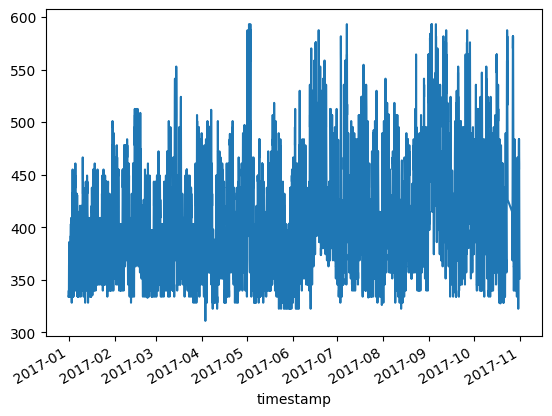

In [78]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

data['power'].plot()

In [79]:
print(data['power'].isna().sum())
print(data['airTemperature'].isna().sum())

0
0


In [80]:
from sklearn.preprocessing import scale

#data[['power', 'airTemperature']] = scale(data[['power', 'airTemperature']])
#features = ["year", "month", "day", "hour", "weekday", "weekofyear", "quarter"]
features = ["month", "day", "hour", "weekday"]

# Train data
X_train = data.drop("power",axis=1)
y_train = data["power"]
X_train.reset_index(inplace=True)
X_train['timestamp'] = pd.to_datetime(X_train['timestamp'])
X_train[features] = X_train.apply(lambda row: pd.Series({ "month":row.timestamp.month, "day":row.timestamp.day, "hour":row.timestamp.hour, "weekday":row.timestamp.weekday()}), axis=1)
X_train.drop("timestamp",axis=1,inplace=True)


data_test = building_data_test.join(weather_data, how='inner')
X_test = data_test.drop("power",axis=1)
y_test = data_test["power"]
X_test.reset_index(inplace=True)
X_test['timestamp'] = pd.to_datetime(X_test['timestamp'])
X_test[features] = X_test.apply(lambda row: pd.Series({ "month":row.timestamp.month, "day":row.timestamp.day, "hour":row.timestamp.hour, "weekday":row.timestamp.weekday(), }), axis=1)
X_test.drop("timestamp",axis=1,inplace=True)



**3.2** _Model training and selection_: a regression model based on one of the methods available in the scikit-library should be trained. Different methods of the scikit library can be tested (https://scikit-learn.org/stable/supervised_learning.html). If reputed necessary, hyperparameter tuning should be performed employing cross validation as introduced during the course

In [81]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter space
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create random search grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create RandomForestRegressor object
rf = RandomForestRegressor()

# Perform random search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42,
                               n_jobs = -1)

# Fit the random search model to the data
rf_random.fit(X_train, y_train)

# Extract best hyperparameters
best_params = rf_random.best_params_

print("Best hyperparameters:\n", best_params)

# Create a new RandomForestRegressor with best hyperparameters
rf = RandomForestRegressor( n_estimators=best_params['n_estimators'],
                           max_features=best_params['max_features'],
                           max_depth=best_params['max_depth'],
                           min_samples_split=best_params['min_samples_split'],
                           min_samples_leaf=best_params['min_samples_leaf'],
                           bootstrap=best_params['bootstrap'])
#{'n_estimators': 171, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
#Best hyperparameters:{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters:
 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


**3.3** _Performance evaluation_: the performance of the model should be evaluated using appropriate metrics, such as mean absolute error, and root mean square error

In [82]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [83]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAPE: 5.10%
MAE: 20.02
MSE: 609.56


**3.3** _Model deployment_: the trained (and validated) model should be, applied to the testing dataset to estimate the energy consumption. The estimated energy consumption should be compared with the actual energy consumption to evaluate overconsumption and underconsumption as introduced during the course

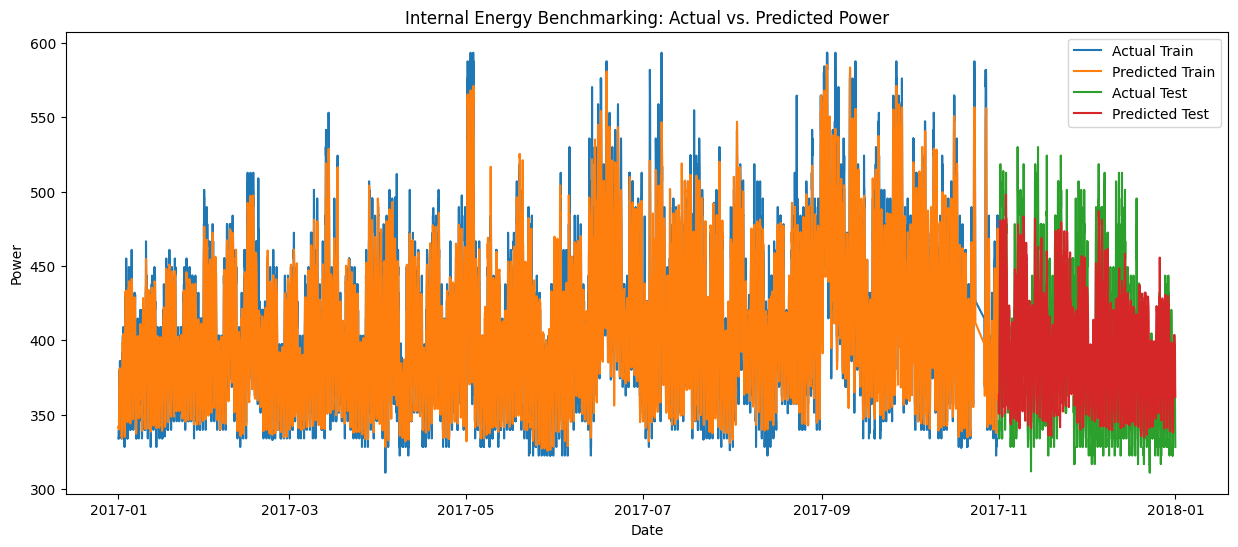

In [84]:
# Line plot with predictions and real values for both training and testing
y_train_pred = rf.predict(X_train)

plt.figure(figsize=(15, 6))
plt.plot(data.index, y_train, label="Actual Train")
plt.plot(data.index, y_train_pred, label="Predicted Train")
plt.plot(data_test.index, y_test, label="Actual Test")
plt.plot(data_test.index, y_pred, label="Predicted Test")
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Internal Energy Benchmarking: Actual vs. Predicted Power")
plt.legend()
plt.show()

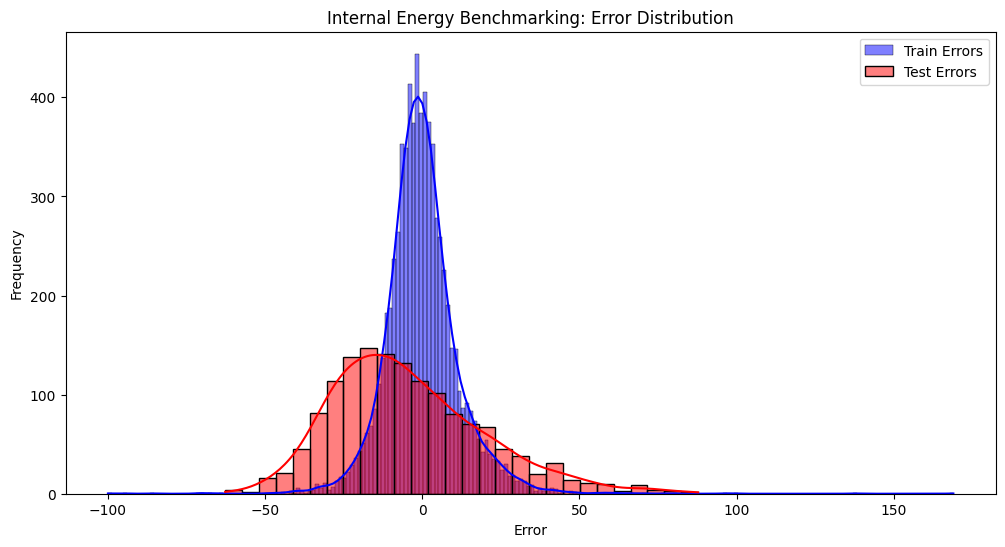

In [86]:
# Plot with the distribution of the errors for both training and testing
train_errors = y_train - y_train_pred
test_errors = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(train_errors, kde=True, color="blue", label="Train Errors")
sns.histplot(test_errors, kde=True, color="red", label="Test Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Internal Energy Benchmarking: Error Distribution")
plt.legend()
plt.show()

In [87]:
import scipy.stats as stats

def prediction_intervals(y_true_train, y_pred_train, y_pred_test, alpha=0.95):
    errors = y_true_train - y_pred_train
    std_errors = np.std(errors)
    z_score = stats.norm.ppf(1 - (1 - alpha) / 2)
    
    lower_bounds = y_pred_test - z_score * std_errors
    upper_bounds = y_pred_test + z_score * std_errors
    
    return lower_bounds, upper_bounds

lower_bounds, upper_bounds = prediction_intervals(y_train, y_train_pred, y_pred)

In [88]:
data_test['underconsumption'] = lower_bounds - data_test['power']
data_test['underconsumption'] = data_test['underconsumption'].clip(lower=0)
total_underconsumption = np.round(data_test['underconsumption'].sum(), 1)
total_consumption = np.round(data_test['power'].sum(), 1)
underconsumption_percentage = np.round(total_underconsumption/total_consumption*100, 2)
print(f'Total underconsumption identified: {total_underconsumption} kWh')
print(f'Percentage of underconsumption over total: {underconsumption_percentage} %')

Total underconsumption identified: 3074.5 kWh
Percentage of underconsumption over total: 0.54 %


In [89]:
data_test['overconsumption'] = data_test['power'] - upper_bounds
data_test['overconsumption'] = data_test['overconsumption'].clip(lower=0)
total_overconsumption = np.round(data_test['overconsumption'].sum(), 1)
overconsumtion_percentage = np.round(total_overconsumption/total_consumption*100, 2)
print(f'Total overconsumption identified: {total_overconsumption} kWh')
print(f'Percentage of overconsumption over total: {overconsumtion_percentage} %')

Total overconsumption identified: 3312.6 kWh
Percentage of overconsumption over total: 0.58 %


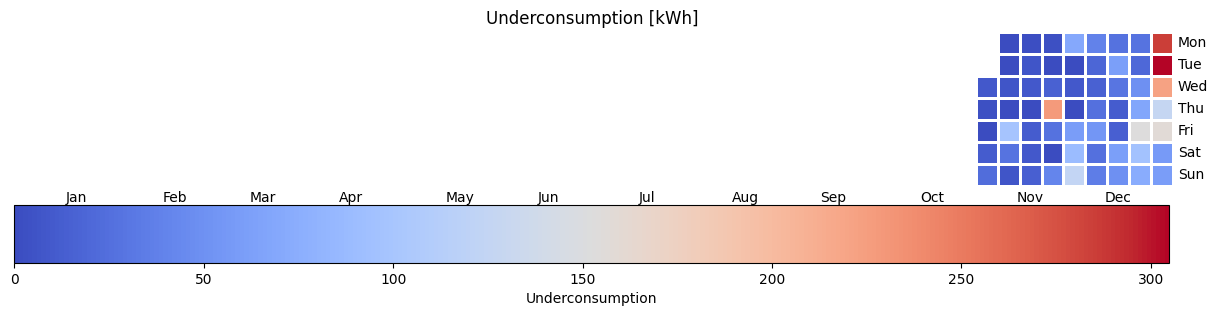

In [92]:
import calmap
import matplotlib as mpl

data_test['date'] = data_test.index.date
underconsumption_day = data_test.groupby('date')['underconsumption'].sum().reset_index()
underconsumption_day['date'] = pd.to_datetime(underconsumption_day['date'])
underconsumption_day = underconsumption_day.set_index('date')

plt.figure(figsize=(15, 5))
calmap.yearplot(underconsumption_day['underconsumption'], year=2017, cmap='coolwarm', fillcolor='white')
plt.title("Underconsumption [kWh]")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=underconsumption_day['underconsumption'].min(), vmax=underconsumption_day['underconsumption'].max())
cax = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal', pad=0.05)
cax.set_label("Underconsumption")
plt.show()

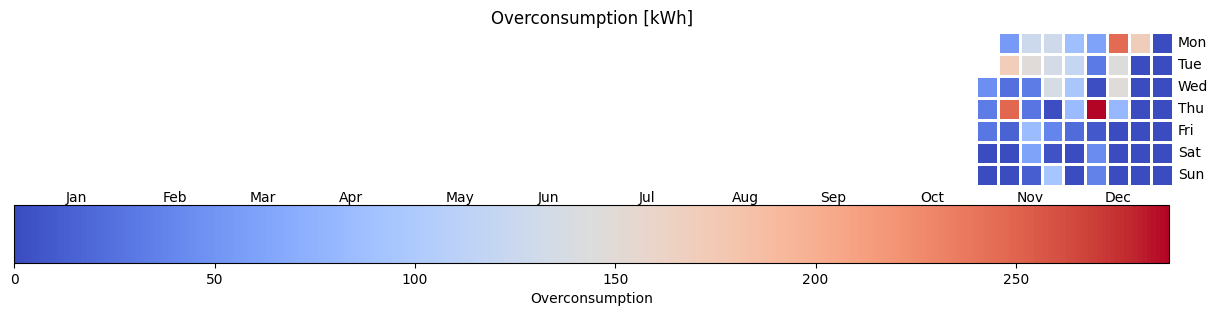

In [91]:
overconsumption_day = data_test.groupby('date')['overconsumption'].sum().reset_index()
overconsumption_day['date'] = pd.to_datetime(overconsumption_day['date'])
overconsumption_day = overconsumption_day.set_index('date')

plt.figure(figsize=(15, 5))
calmap.yearplot(overconsumption_day['overconsumption'], year=2017, cmap='coolwarm', fillcolor='white')
plt.title("Overconsumption [kWh]")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=overconsumption_day['overconsumption'].min(), vmax=overconsumption_day['overconsumption'].max())
cax = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal', pad=0.05)
cax.set_label("Overconsumption")
plt.show()

In [94]:
data_test['lower_bounds'] = lower_bounds
data_test['upper_bounds'] = upper_bounds
data_test['power_pred'] = y_pred

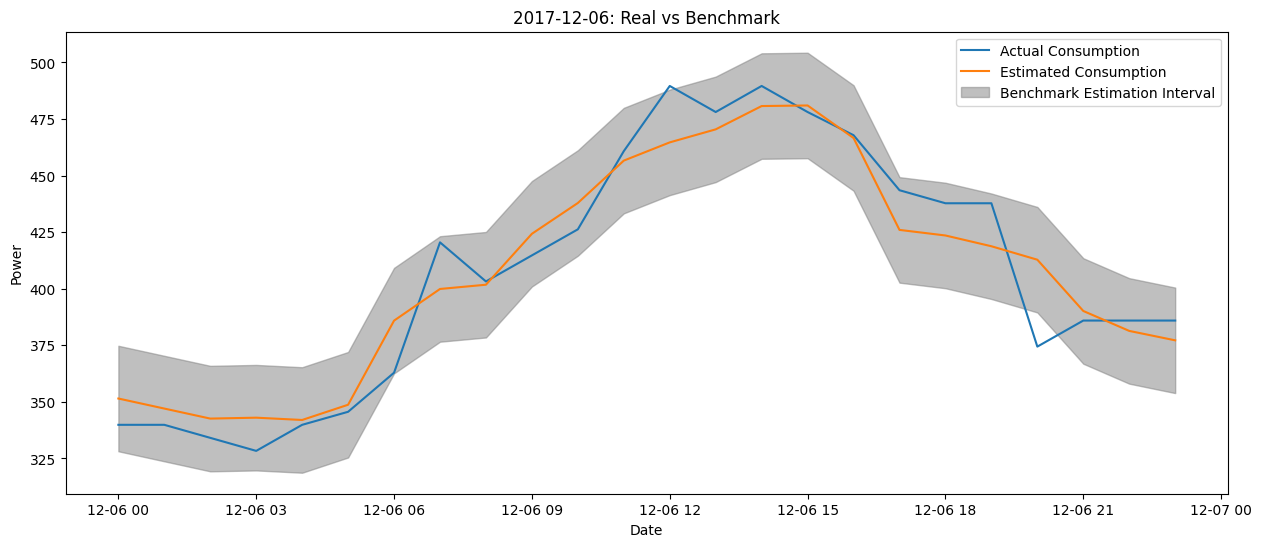

In [95]:
test_subset = data_test["2017-12-06"]

plt.figure(figsize=(15, 6))
plt.plot(test_subset.index, test_subset.power, label="Actual Consumption")
plt.plot(test_subset.index, test_subset.power_pred, label="Estimated Consumption")
plt.fill_between(test_subset.index, test_subset.lower_bounds, test_subset.upper_bounds, color="gray", alpha=0.5, 
                 label="Benchmark Estimation Interval")
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("2017-12-06: Real vs Benchmark")
plt.legend()
plt.show()

**3.4** _Data visualization and comment_: visualizations describing the solution obtained should be produced with a critical comment of the results